<hr/>

# EN.520.637 Foundations of Reinforcement Learning

<hr/>

<h1><font color="darkblue">Lab 4: Multi-armed Bandits, Monte Carlo Control & TD-Methods (60 points)  </font></h1>





##  Content
1. Multi-armed Bandits
2. Monte Carlo Methods
3. TD-Methods: SARSA, Q-learning

In [ ]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Problem 1.  Greedy and $\epsilon$-greedy algorithm (30 points)

Taken from [P 21, Ch 2.3, Sutton&Barton]
#### Define a 10-armed bandit problem in which the action values $q_*(a)$, $a = 1,...,10$, are samples from a standard normal distribution, i.e. Gaussian distribution with mean $= 0$ and variance $ = 1$. Then, when selected $A_t$ at time step $t$, the actual reward, $R_t$ is selected from a Gaussian distribution with mean = $q_*(A_t)$ and variance = 1.

---

## 1.1 Epsilon greedy (15 points)

We will see the average performance of epsilon greedy algorithms on this problem. To this matter, you will:
- given the bandits, use your algorithm for 1000 time steps.
- Repeat for 2000 independent trials.

1. Implement a function/functions that runs 2000 independent experiments. An experiment is defined as 1. an initialization of the bandit reward distributions, and 2. running your algorithm for 1000 time steps, using an $\epsilon$-greedy algorithm. Your function/functions should take $\epsilon$ as one of the inputs and output:
<br>   (a) average reward at each time step
<br>   (b) percentage of optimal action at each time step. (optimal action is defined by $a^* = arg\underset{a}max           \, q^*(a)$ )
3. Call your function/functions to generate the average reward and percentage of optimal action at each time step with:
<br>   (a) Greedy-algorithm
<br>   (b) $\epsilon$-greedy algorithm, $\epsilon=0.01$
<br>   (c) $\epsilon$-greedy algorithm, $\epsilon=0.1$.
4. Plot the average reward and percentage of optimal action of those three cases and compare with [P 23 Fig 2.2 Sutton].

### 1.1.1 (5 points)

### 1.1.2 (5 points)

### 1.1.3 (5 points)

---
## 1.2  UCB Action Selection (15 points)

1. Implement a function/functions that runs 2000 instances of this experiment, each experiment for 1000 time steps, using UCB Action Selection algorithm. Your function/functions should take $c$ as one of the inputs and output:
<br>   - average reward at each time step.
2. Call your function/functions to generate the average reward at each time step with:
<br>   - UCB Action Selection algorithm, $c = 2$.
3. Plot the average reward of 2.2 and 1.2c, then compare with [P 28 Fig 2.4 Sutton].

### 1.2.1 (5 points)

### 1.2.2 (5 points)

### 1.2.3 (5 points)

# Problem 2. Monte Carlo Methods  (CartPole-v1 environment) (20 points)

## 2.1 CartPole Introduction

We now apply Monte Carlo Method for the CartPole problem. See:
[CartPole documentation](https://gymnasium.farama.org/environments/classic_control/cart_pole/)


1. A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track.

0. The system is controlled by applying a force of +1 or -1 to the cart.

0. The pendulum starts upright, and the goal is to prevent it from falling over.

0. A reward of +1 is provided for every timestep that the pole remains upright.

0. The episode ends when the pole is more than 15 degrees from vertical, or the cart moves more than 2.4 units from the center.

0. For more info (See [SOURCE ON GITHUB](https://github.com/openai/gym/blob/master/gym/envs/classic_control/cartpole.py)).



The following examples show the basic usage of this testing environment:



### 2.1.1 Episode initialization and Initial Value

In [ ]:
import gym

In [ ]:
env = gym.make('CartPole-v0')
observation = env.reset() ##Initial an episode

if gym.__version__>'0.26.0':
    observation = observation[0]

print("Inital observation is {}".format(observation))

print("\nThis means the cart current position is {}".format(observation[0]), end = '')
print(" with velocity {},".format(observation[1]))

print("and the pole current angular position is {}".format(observation[2]), end = '')
print(" with angular velocity {},".format(observation[3]))


Inital observation is [0.00821616 0.03603547 0.03568365 0.01848931]

This means the cart current position is 0.008216163143515587 with velocity 0.03603547438979149,
and the pole current angular position is 0.03568364679813385 with angular velocity 0.018489308655261993,


/Users/agu/opt/anaconda3/envs/safe-gym/lib/python3.10/site-packages/gym/envs/registration.py:555: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(


### 2.1.2 Take actions


Use env.step(action) to take an action

action is an integer from 0 to 1

0: "Left"; 1: "Right"

In [ ]:
print("Current observation is {}".format(observation))

action = 0 #go left

#################### simulate one step
if gym.__version__>'0.26.0':
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
else:
    observation, reward, done, info = env.step(action)
####################



print("\nNew observation is {}".format(observation))
print("Step reward is {}".format(reward))
print("Did episode just end? -{}".format(done)) # episode ends when 3.1(6) happens


Current observation is [0.00821616 0.03603547 0.03568365 0.01848931]

New observation is [ 0.00893687 -0.15957958  0.03605343  0.32221386]
Step reward is 1.0
Did episode just end? -False


/Users/agu/opt/anaconda3/envs/safe-gym/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


### 2.1.3 Simulate multiple episodes

(You may uncomment those lines to see an animation. However, it will not work for JupyterHub since the animation requires GL instead of webGL. If you have Jupyter notebook localy on your computer, this version of code will work through a virtual frame.)

In [ ]:
env = gym.make('CartPole-v0')
observation = env.reset()
total_reward = 0
ep_num = 0


for _ in range(1000):

    action = env.action_space.sample()     # this takes random actions

    #################### simulate one step
    if gym.__version__>'0.26.0':
        observation, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
    else:
        observation, reward, done, info = env.step(action)
    ####################

    total_reward += reward



    if done:                               # episode just ends
        observation = env.reset()          # reset episode
        ep_num += 1

print("Average reward per episode is {}".format(total_reward/ep_num))
env.close()


Average reward per episode is 23.80952380952381


### 2.1.4 States Discretization

The class DiscreteObs() discretizes the observation space into discrete state space, based on numpy.digitize (Please read its description in https://numpy.org/doc/stable/reference/generated/numpy.digitize.html)

Discretization of observation space is necessary for tabular methods. You can use DiscreteObs() or any other library for discretizing the observation space.

In [ ]:
class DiscretObs():


    def __init__(self, bins_list):
        self._bins_list = bins_list

        self._bins_num = len(bins_list)
        self._state_num_list = [len(bins)+1 for bins in bins_list]
        self._state_num_total = np.prod(self._state_num_list)

    def get_state_num_total(self):

        return self._state_num_total

    def obs2state(self, obs):

        if not len(obs)==self._bins_num:
            raise ValueError("observation must have length {}".format(self._bins_num))
        else:
            return [np.digitize(obs[i], bins=self._bins_list[i]) for i in range(self._bins_num)]

    def obs2idx(self, obs):

        state = self.obs2state(obs)

        return self.state2idx(state)

    def state2idx(self, state):

        idx = 0
        for i in range(self._bins_num-1,-1,-1):
            idx = idx*self._state_num_list[i]+state[i]

        return idx

    def idx2state(self, idx):

        state = [None]*self._bins_num
        state_num_cumul = np.cumprod(self._state_num_list)
        for i in range(self._bins_num-1,0,-1):
            state[i] = idx/state_num_cumul[i-1]
            idx -=state[i]*state_num_cumul[i-1]
        state[0] = idx%state_num_cumul[0]

        return state

# Recommended Discretization for Carpole-v1 when using Monte-Carlo methods
bins_pos = np.linspace(-2.4,2.4,40)        # position
bins_d_pos = np.linspace(-3,3,5)           # velocity
bins_ang = np.linspace(-0.2618,0.2618,40)  # angle
bins_d_ang = np.linspace(-0.3,0.3,5)       # angular velocity

dobs = DiscretObs([bins_pos,bins_d_pos,bins_ang,bins_d_ang])
observation = env.reset()
if gym.__version__>'0.26.0':
    observation = observation[0]

state = dobs.obs2state(observation)
idx = dobs.obs2idx(observation)

print("Current position of the cart is {:.4f}\n".format(observation[0]))
print("Current velocity of the cart is {:.4f}\n".format(observation[1]))
print("Current angular position of the pole is {:.4f} rad\n".format(observation[2]))
print("Current angular velocity of the pole is {:.4f} rad\n".format(observation[3]))

print("which are mapped to state {}, with corresponding index {}".format(state,idx))


Current position of the cart is 0.0187

Current velocity of the cart is 0.0399

Current angular position of the pole is -0.0320 rad

Current angular velocity of the pole is -0.0040 rad

which are mapped to state [20, 3, 18, 2], with corresponding index 24743


## 2.2 On-policy first-visit MC control
### Task 2. [Coding, 20 points]

1. Implement "On-policy first-visit MC control" algorithum in [Ch 5.4 Sutton] to choose optimal actions
2. Simulate this algorithm for 40000 episodes.
3. Plot the reward for each episode

### 2.1 Implementation (15 points)

In [ ]:
## Suggested functions (Feel free to modify existing and add new functions)

def get_action(current_state, Q, epsilon):

    # Choose optimal action based on current state and Q
    #
    # input:  current state,  (array)
    #         Q,              (array)
    #         epsilonn,       (float)
    # output: action
    #
    return action



def update_Q(Q, observation_list, action_list):
    # Update Q at the end of each episode
    #
    # input:  current Q, (array)
    #         observation_list,       (array)  states observed in this episode
    #         action_list,       (array)  actions took in this spisode
    # output: Updated Q
    #


    return Q


## Suggested flow (Feel free to modify and add)

# parameters for epsilon-greedy algorithm, when epsilon_decay_rate=1, the algorothm implement a fixed
# epsilon value as epsilon_start, you can choose either fixed epsilon or decaying epsilon

# epsilon_start = 0.3
# epsilon_decay_rate = 0.97

env = gym.make('CartPole-v1')

observation = env.reset()
if gym.__version__>'0.26.0':
    observation = observation[0]


# --------------------------------------------
# Add all the code snippets that you need here
# --------------------------------------------

while 1:


    current_state =                             # discretize the observation space

    action = get_action(current_state,Q,epsilon)# pick action by epsilon greedy policy

    #################### simulate one step
    if gym.__version__>'0.26.0':
        observation, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
    else:
        observation, reward, done, info = env.step(action)
    ####################

    if done:  # end of epsode
        Q = update_Q(Q, observation_list, action_list) # update Q for past observations in the episode

        observation = env.reset()
        if gym.__version__>'0.26.0':
            observation = observation[0]

        ep_num += 1

        if condition:
            # Apply epsilon decay (if you want to. You can do this for example every N episodes.)
            pass
env.close()

SyntaxError: invalid syntax (2946652859.py, line 51)

### 2.2 Plot your results (5 points)

Since results are noisy, you can try:
- Plotting your un-filtered results
- using window-averaging to smooth out your results (code snippet below)

Plot both curves in the same figure


In [ ]:
# Window averaging to smooth out plots

def moving_average(arr, window_size):
    # Smoothes array 'arr' with 'window size'
    window = np.ones(window_size) / window_size
    # Apply convolution for moving average
    return np.convolve(arr, window, mode='valid')

In [ ]:
### Your code here

# Problem 3: TD-Methods (SARSA & Q-learning) (60 points)

## 3.1 Cliff walk enviornment

### 3.1.1 Intro to Cliff walk

In this section, we use SARSA and Q-learning algorithm to solve to a cliff walk problem. ( See Sutton&Barto Example 6.6 )

The grid is shown below, the black tiles represents wall/obstacles, the white tiles are the non-terminal tiles, and the tile with "s" is the starting point of every episoid, the tile with "G" is the goal point.

The agent start at "s" tile. At every step, the agent can choose one of the four actions:"up","right","down","left", moving to the next tile in that direction.

$\cdot$ If the next tile is wall/obstacle, the agent does not move and receive -1 reward;

$\cdot$ If the next tile is a non-terminal tile, the agent move to that tile and receive 0 reward;

$\cdot$ If the next tile is the goal tile, the episoid is finished and the agent receive 100 reward (set to be 100 to accelarate the training).

$\cdot$ If the next tile is the cliff, the episoid is finished and the agent receive -100 reward ;

In [7]:
# The environment
import matplotlib.pyplot as plt
import numpy as np


class CliffWalk:

    def __init__(self, reward_wall=-1):
        # initialize grid with 2d numpy array
        # >0: goal
        # -1: wall/obstacles
        # 0: non-terminal
        self._grid = np.array(
            [ [0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0],
             [0, -100, -100, -100, -100, -100, -100, 100]
             ])
        # wall around the grid, padding grid with -1
        self._grid_padded = np.pad(self._grid, pad_width=1, mode='constant', constant_values=-1)
        self._reward_wall = reward_wall

        # set start state
        self._start_state = (3, 0)
        self._random_start = False

        # store position of goal states and non-terminal states
        idx_goal_state_y, idx_goal_state_x = np.nonzero(self._grid > 0)
        self._goal_states = [(idx_goal_state_y[i], idx_goal_state_x[i]) for i in range(len(idx_goal_state_x))]

        idx_non_term_y, idx_non_term_x = np.nonzero(self._grid == 0)
        self._non_term_states = [(idx_non_term_y[i], idx_non_term_x[i]) for i in range(len(idx_non_term_x))]

        # store the current state in the padded grid
        self._state_padded = (self._start_state[0] + 1, self._start_state[1] + 1)

    def get_state_num(self):
        # get the number of states (total_state_number) in the grid, note: the wall/obstacles inside the grid are
        # counted as state as well
        return np.prod(np.shape(self._grid))

    def get_state_grid(self):

        state_grid = np.multiply(np.reshape(np.arange(self.get_state_num()), self._grid.shape), self._grid >= 0) - (
                self._grid == -1) #- (self._grid == -100)

        return state_grid, np.pad(state_grid, pad_width=1, mode='constant', constant_values=-1)

    def get_current_state(self):
        # get the current state as an integer from 0 to total_state_number-1
        y, x = self._state_padded
        return (y - 1) * self._grid.shape[1] + (x - 1)

    def int_to_state(self, int_obs):
        # convert an integer from 0 to total_state_number-1 to the position on the non-padded grid
        x = int_obs % self._grid.shape[1]
        y = int_obs // self._grid.shape[1]
        return y, x

    def reset(self):
        # reset the gridworld
        if self._random_start:
            # randomly start at a non-terminal state
            idx_start = np.random.randint(len(self._non_term_states))
            start_state = self._non_term_states[idx_start]
            self._state_padded = (start_state[0] + 1, start_state[1] + 1)
        else:
            # start at the designated start_state
            self._state_padded = (self._start_state[0] + 1, self._start_state[1] + 1)

    def step(self, action):
        # take one step according to the action
        # input: action (integer between 0 and 3)
        # output: reward           reward of this action
        #         terminated       1 if reaching the terminal state, 0 otherwise
        #         next_state       next state after this action, integer from 0 to total_state_number-1)
        y, x = self._state_padded

        if action == 0:  # up
            new_state_padded = (y - 1, x)
        elif action == 1:  # right
            new_state_padded = (y, x + 1)
        elif action == 2:  # down
            new_state_padded = (y + 1, x)
        elif action == 3:  # left
            new_state_padded = (y, x - 1)
        else:
            raise ValueError("Invalid action: {} is not 0, 1, 2, or 3.".format(action))

        new_y, new_x = new_state_padded
        if self._grid_padded[new_y, new_x] == -1:  # wall/obstacle
            reward = self._reward_wall
            new_state_padded = (y, x)
        elif self._grid_padded[new_y, new_x] == 0:  # non-terminal cell
            reward = -1.
        else:  # a goal
            reward = self._grid_padded[new_y, new_x]
            self.reset()
            terminated = 1
            return reward, terminated, self.get_current_state()

        terminated = 0
        self._state_padded = new_state_padded
        return reward, terminated, self.get_current_state()


    def plot_grid(self, plot_title=None):
        # plot the grid
        plt.figure(figsize=(5, 5))
        plt.imshow((self._grid_padded == -1) + (self._grid_padded == -100) * 0.5, cmap='Greys', vmin=0, vmax=1)
        ax = plt.gca()
        ax.grid(0)
        plt.xticks([])
        plt.yticks([])

        if plot_title:
            plt.title(plot_title)

        plt.text(
            self._start_state[1] + 1, self._start_state[0] + 1,
            r"$\mathbf{S}$", ha='center', va='center')
        for goal_state in self._goal_states:
            plt.text(
                goal_state[1] + 1, goal_state[0] + 1,
                r"$\mathbf{G}$", ha='center', va='center')
        h, w = self._grid_padded.shape
        for y in range(h - 1):
            plt.plot([-0.5, w - 0.5], [y + 0.5, y + 0.5], '-k', lw=2)
        for x in range(w - 1):
            if x in np.arange(2,7):
                plt.plot([x + 0.5, x + 0.5], [-0.5, h - 2.5], '-k', lw=2)
                continue
            plt.plot([x + 0.5, x + 0.5], [-0.5, h - 0.5], '-k', lw=2)
        plt.text(4.5, 4,r"T h e   C l i f f", ha='center', va='center')

    def plot_state_values(self, state_values, value_format="{:.1f}",plot_title=None):
        # plot the state values
        # input: state_values     (total_state_number, )-numpy array, state value function
        #        plot_title       str, title of the plot
        plt.figure(figsize=(5, 5))
        plt.imshow((self._grid_padded == -1) + (self._grid_padded == -100) * 0.5, cmap='Greys', vmin=0, vmax=1)
        ax = plt.gca()
        ax.grid(0)
        plt.xticks([])
        plt.yticks([])

        if plot_title:
            plt.title(plot_title)

        for (int_obs, state_value) in enumerate(state_values):
            y, x = self.int_to_state(int_obs)
            if (y, x) in self._non_term_states:
                plt.text(x + 1, y + 1, value_format.format(state_value), ha='center', va='center')
        for goal_state in self._goal_states:
            plt.text(
                goal_state[1] + 1, goal_state[0] + 1,
                r"$\mathbf{G}$", ha='center', va='center')
        h, w = self._grid_padded.shape
        for y in range(h - 1):
            plt.plot([-0.5, w - 0.5], [y + 0.5, y + 0.5], '-k', lw=2)
        for x in range(w - 1):
            if x in np.arange(2,7):
                plt.plot([x + 0.5, x + 0.5], [-0.5, h - 2.5], '-k', lw=2)
                continue
            plt.plot([x + 0.5, x + 0.5], [-0.5, h - 0.5], '-k', lw=2)

    def plot_policy(self, policy, plot_title=None):
        # plot a deterministic policy
        # input: policy           (total_state_number, )-numpy array, contains action as integer from 0 to 3
        #        plot_title       str, title of the plot
        action_names = [r"$\uparrow$", r"$\rightarrow$", r"$\downarrow$", r"$\leftarrow$"]
        plt.figure(figsize=(5, 5))
        plt.imshow((self._grid_padded == -1) + (self._grid_padded == -100) * 0.5, cmap='Greys', vmin=0, vmax=1)
        ax = plt.gca()
        ax.grid(0)
        plt.xticks([])
        plt.yticks([])

        for goal_state in self._goal_states:
            plt.text(
                goal_state[1] + 1, goal_state[0] + 1,
                r"$\mathbf{G}$", ha='center', va='center')

        if plot_title:
            plt.title(plot_title)

        for (int_obs, action) in enumerate(policy):
            y, x = self.int_to_state(int_obs)
            if (y, x) in self._non_term_states:
                action_arrow = action_names[action]
                plt.text(x + 1, y + 1, action_arrow, ha='center', va='center')


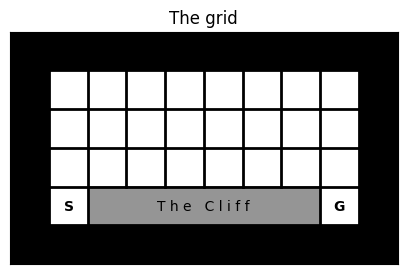

In [8]:
gw = CliffWalk()
gw.plot_grid(plot_title='The grid')

### 3.1.2 States and state values
Excluding the wall around the grid, there are 32 tiles (INCLUDING obstacles inside the grid), and they correspond to 32 states (obstacles and goal are non-reachable states).

We use numbers from 0 to 24 to represent these states (see gridworld.py for the coversion between integer and tile position). The correspondance are as shown below:

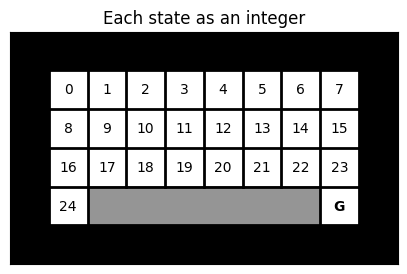

In [5]:
gw.plot_state_values(np.arange(25),value_format="{:d}",plot_title='Each state as an integer')

### 3.1.3 Taking actions
Use GridWorld.step(action) to take an action, and use GridWorld.reset() to restart an episoid

action is an integer from 0 to 3

0: "Up"; 1: "Right"; 2: "Down"; 3: "Left"

In [ ]:
gw.reset()

current_state = gw.get_current_state()
tile_pos = gw.int_to_state(current_state)

print("The current state is {}, which corresponds to tile position {}\n".format(current_state,tile_pos))

action = np.random.randint(4)
reward, terminated, next_state = gw.step(action)
tile_pos = gw.int_to_state(next_state)

print("Take action {}, get reward {}, move to state {}".format(action,reward,next_state))
print("Now the current state is {}, which corresponds to tile position {}\n".format(next_state,tile_pos))

gw.reset()
current_state = gw.get_current_state()
tile_pos = gw.int_to_state(current_state)
print("Reset episode")
print("Now the current state is {}, which corresponds to tile position {}".format(current_state,tile_pos))



### 3.1.4. Plotting Deterministic Policies
A deterministic policy is a function from state to action, which can be represented by a (32,)-numpy array whose entries are all integers in (0-3)

In [ ]:
gw.plot_policy(np.random.randint(4,size=(32,)),plot_title='A deterministic policy')

## 3.2 SARSA & Q_learning

You will now implement Sarsa and Q learning

In [ ]:
## Suggested functions (Feel free to modify existing and add new functions)


def update_Q(Q, current_idx, next_idx, current_action, next_action, alpha, R, gamma):
    # Update Q at the each step
    #
    # input:  current Q,                    (array)
    #         current_idx, next_idx         (array)  states
    #         current_action, next_action   (array)  actions
    #         alpha, R, gamma               (floats) learning rate, reward, discount rate
    # output: Updated Q
    #
    return Q

def get_action(current_idx, Q, epsilon):

    # Choose optimal action based on current state and Q
    #
    # input:  current_idx     (array)
    #         Q,              (array)
    #         epsilon,        (float)
    # output: action
    return action

### [Task] 3.2.1 SARSA [Coding: 10 points]

* Implement SARSA (See Sutton&Barto Section 6.4) on this example for 5000 episodes to learn the optimal policy.
* Plot the greedy policy of the learned Q-function using gw.plot_policy()

In [ ]:
## Suggested flow (Feel free to modify and add)
## SARSA
Q  = np.zeros((25,4))

gw.reset()

max_ep = 5000

total_reward_sarsa = np.zeros(max_ep)

epsilon = 0.1
alpha = 0.5
gamma = 0.9


for ep in range(0, max_ep):
    gw.reset()
    terminated = False



    while terminated == False:
        reward, terminated, next_state = gw.step(current_action)
        if not reward == 100: total_reward_sarsa[ep] += reward
        next_action = get_action(next_state,Q,epsilon)

        Q = update_Q(Q, current_state, next_state, current_action, next_action, alpha, reward, gamma)


        current_state = next_state
        current_action = next_action


### [Task] 3.2.2 Q-learning [Coding: 10 points]
* Implement Q_learning algorithm (See Sutton&Barto Section 6.5) on this example for 5000 episodes to learn the optimal policy.
* Plot the greedy policy of the learned Q-function using gw.plot_policy()



In [ ]:
## Suggested flow (Feel free to modify and add)
## Q_learning
Q  = np.zeros((25,4))


gw.reset()


max_ep = 5000

total_reward_qlearning = np.zeros(max_ep)

epsilon = 0.1
alpha = 0.5
gamma = 0.9


for ep in range(0, max_ep):
    gw.reset()
    terminated = False



    while terminated == False:
        reward, terminated, next_state = gw.step(current_action)
        if not reward == 100: total_reward_qlearning[ep] += reward
        max_action = get_action(next_state,Q,0)


        Q = update_Q(Q, current_state, next_state, current_action, max_action, alpha, reward, gamma)


        current_state = next_state

### [Task 3.2.3] Comparison [Coding/Question 10 points]
* Plot the total rewards during one episode v.s. number of episodes trained for both SARSA and Q-Learning.

* Compare your plot to the one in [Sutton & Barto Figure 6.4].

* Which algorithm obtains bette performance? Provide some intuition on why this is the case.

(Optional)You may  

1. Smooth your curve by taking the average of total rewards over successive 50 episodes
2. Avoid adding the artificial "+100" goal reward to the total reward to match you figure with the book (Although we need to used goal reward when update the Q-function )



In [ ]:
# Your code

***Your written answer/comparison here***

## 3.3 CartPole-v1 environment

### 3.3.1 CartPole Introduction

We now use SARSA and Q-learning on the CartPole problem.


1. A pole is attached via an un-actuated joint to a cart, which moves along a frictionless track.

0. The system is controlled by applying a force of +1 or -1 to the cart.

0. The pole starts at upright position, and the goal is to prevent it from falling over.

0. A reward of +1 is obtained for every timestep that the pole remains upright.

0. The episode ends when the pole is more than 15 degrees from the vertical, or the cart moves more than 2.4 units from the center.

0. For more info (See [SOURCE ON GITHUB](https://github.com/openai/gym/blob/master/gym/envs/classic_control/cartpole.py)).

The following examples show the basic usage of this testing environment:



### Episode initialization and Initial Value

In [ ]:
env = gym.make('CartPole-v0')
observation = env.reset() ##Initial an episode
if gym.__version__>'0.26.0':
    observation = observation[0]

print("Inital observation is {}".format(observation))

print("\nThis means the cart current position is {}".format(observation[0]), end = '')
print(" with velocity {},".format(observation[1]))

print("and the pole current angular position is {}".format(observation[2]), end = '')
print(" with angular velocity {},".format(observation[3]))


### Taking actions


Use env.step(action) to take an action

action is an integer from 0 to 1

0: "Left"; 1: "Right"

In [ ]:
print("Current observation is {}".format(observation))

action = 0 #go left
#################### simulate one step
if gym.__version__>'0.26.0':
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
else:
    observation, reward, done, info = env.step(action)
####################

print("\nNew observation is {}".format(observation))
print("Step reward is {}".format(reward))
print("Did episode just ends? -{}".format(done)) # episode ends when 3.1(6) happens



### Simulating multiple episodes

(You may uncomment those lines to see an animation. However, it will not work for JupyterHub since the animation requires GL instead of webGL. If you have Jupyter notebook localy on your computer, this version of code will work through a virtual frame.)

In [ ]:
env = gym.make('CartPole-v0')
observation = env.reset()
if gym.__version__>'0.26.0':
    observation = observation[0]
total_reward = 0
ep_num = 0
# img = plt.imshow(env.render(mode='rgb_array'))


for _ in range(1000):
    #     img.set_data(env.render(mode='rgb_array'))
    #     display.display(plt.gcf())
    #     display.clear_output(wait=True)

    action = env.action_space.sample()     # this takes random actions
    #################### simulate one step
    if gym.__version__>'0.26.0':
        observation, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
    else:
        observation, reward, done, info = env.step(action)
    ####################

    total_reward += reward



    if done:                               # episode just ends
        observation = env.reset()          # reset episode
        if gym.__version__>'0.26.0':
            observation = observation[0]
        ep_num += 1

print("Average reward per episode is {}".format(total_reward/ep_num))
env.close()


### States Discretization

The class DiscreteObs() discretizes the observation space into discrete state space, based on numpy.digitize (Please read its description in https://numpy.org/doc/stable/reference/generated/numpy.digitize.html)

Discretization of observation space is necessary for tabular methods. You can use DiscreteObs() or any other library for discretizing the observation space.

In [ ]:
class DiscretObs():


    def __init__(self, bins_list):
        self._bins_list = bins_list

        self._bins_num = len(bins_list)
        self._state_num_list = [len(bins)+1 for bins in bins_list]
        self._state_num_total = np.prod(self._state_num_list)

    def get_state_num_total(self):

        return self._state_num_total

    def _state_num_list(self):

        return self._state_num_list

    def obs2state(self, obs):

        if not len(obs)==self._bins_num:
            raise ValueError("observation must have length {}".format(self._bins_num))
        else:
            return [np.digitize(obs[i], bins=self._bins_list[i]) for i in range(self._bins_num)]

    def obs2idx(self, obs):

        state = self.obs2state(obs)

        return self.state2idx(state)

    def state2idx(self, state):

        idx = 0
        for i in range(self._bins_num-1,-1,-1):
            idx = idx*self._state_num_list[i]+state[i]

        return idx

    def idx2state(self, idx):

        state = [None]*self._bins_num
        state_num_cumul = np.cumprod(self._state_num_list)
        for i in range(self._bins_num-1,0,-1):
            state[i] = idx//state_num_cumul[i-1]
            idx -=state[i]*state_num_cumul[i-1]
        state[0] = idx%state_num_cumul[0]

        return state

# Recommended epsilon and learning_rate update (Feel free to modify existing and add new functions)
def get_epsilon(t):
    return max(0.1, min(1., 1. - math.log10((t + 1) / 25)))

def get_learning_rate(t):
    return max(0.1, min(1., 1. - math.log10((t + 1) / 25)))



# Recommended Discretization for Carpole-v1 when using Monte-Carlo methods
bins_pos = []                                       # position
bins_d_pos = []                                     # velocity
bins_ang = np.linspace(-0.41887903,0.41887903,5)    # angle
bins_d_ang = np.linspace(-0.87266,0.87266,11)       # angular velocity

dobs = DiscretObs([bins_pos,bins_d_pos,bins_ang,bins_d_ang])
observation = env.reset()
if gym.__version__>'0.26.0':
    observation = observation[0]

state = dobs.obs2state(observation)

idx = dobs.state2idx(state)


print("Current position of the cart is {:.4f}\n".format(observation[0]))
print("Current velocity of the cart is {:.4f}\n".format(observation[1]))
print("Current angular position of the pole is {:.4f} rad\n".format(observation[2]))
print("Current angular velocity of the pole is {:.4f} rad\n".format(observation[3]))

print("which are mapped to state {}, with corresponding index {}".format(state,idx))
print("index {} maps to state{}".format(idx,dobs.idx2state(idx)))


## 3.4 SARSA & Q_learning

In [ ]:
## Suggested functions (Feel free to modify existing and add new functions)


def update_Q(Q, current_idx, next_idx, current_action, next_action, alpha, R, gamma):
    # Update Q at the each step
    #
    # input:  current Q,                    (array)
    #         current_idx, next_idx         (array)  states
    #         current_action, next_action   (array)  actions
    #         alpha, R, gamma               (floats) learning rate, reward, discount rate
    # output: Updated Q
    #
    return Q

def get_action(current_idx, Q, epsilon):

    # Choose optimal action based on current state and Q
    #
    # input:  current_idx     (array)
    #         Q,              (array)
    #         epsilon,        (float)
    # output: action
    return action



### [Task 3.4.1] SARSA [Coding, 10 points]

Implement SARSA algorithm (See Sutton&Barto Section 6.4) on this example for 1000 episodes to learn the optimal policy.

In [ ]:
## Suggested flow (Feel free to modify and add)
## SARSA
total_reward = 0

bins_pos = []
bins_d_pos = []
bins_ang = np.linspace(-0.41887903,0.41887903,5)
bins_d_ang = np.linspace(-0.87266,0.87266,11)

dobs = DiscretObs([bins_pos,bins_d_pos,bins_ang,bins_d_ang])

env = gym.make('CartPole-v1')
observation = env.reset()
if gym.__version__>'0.26.0':
    observation = observation[0]

# Q defined by states
# Q = np.zeros((2,dobs._state_num_list[0],dobs._state_num_list[1],dobs._state_num_list[2],dobs._state_num_list[3]))
# Q defined by index
# Q = np.zeros((2,dobs.get_state_num_total())

count = 0




gamma = 0.98
result = np.zeros(50)
s = 0
for ep in range(1000):
    if  np.mod(ep,20)==0:
        result[s] = total_reward/20
        s+=1
        total_reward = 0

    observation = env.reset()
    if gym.__version__>'0.26.0':
        observation = observation[0]

#     current_state = dobs.obs2state(observation)
#     current_idx = dobs.obs2idx(observation)

    alpha = get_learning_rate(ep)
    epsilon = get_epsilon(ep)


    done = False

    while not done:
        total_reward += 1
        action =
        #################### simulate one step
        if gym.__version__>'0.26.0':
            observation, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
        else:
            observation, reward, done, info = env.step(action)
        ####################

#         next_idx =
#         next_state =
        next_action =

        Q = update_Q(Q, current_idx, next_idx, action, next_action, alpha, reward, gamma)
        current_idx = next_idx


### [Task 3.4.2] Coding [5 points]
- Plot the average reward for each episode
- You may (and are encouraged to) also plot the 'windowed' reward (you can use the same function from MonteCarlo method)


In [ ]:
# Your code here

### [Task 3.4.3] Q-learning [Coding, 10 points]

Implement Q_learning algorithm (See Sutton&Barto Section 6.5) on this example for 1000 episodes to to learn the optimal policy.

In [ ]:
## Suggested flow (Feel free to modify and add)
## Q_learning
total_reward = 0

bins_pos = []
bins_d_pos = []
bins_ang = np.linspace(-0.41887903,0.41887903,5)
bins_d_ang = np.linspace(-0.87266,0.87266,11)

dobs = DiscretObs([bins_pos,bins_d_pos,bins_ang,bins_d_ang])

env = gym.make('CartPole-v1')
observation = env.reset()
if gym.__version__>'0.26.0':
    observation = observation[0]



# Q defined by states
# Q = np.zeros((2,dobs._state_num_list[0],dobs._state_num_list[1],dobs._state_num_list[2],dobs._state_num_list[3]))
# Q defined by index
# Q = np.zeros((2,dobs.get_state_num_total())

gamma = 0.98
result = np.zeros(50)
s = 0
for ep in range(1000):
    if  np.mod(ep,20)==0:
        result[s] = total_reward/20
        s+=1
        total_reward = 0

    observation = env.reset()
    if gym.__version__>'0.26.0':
        observation = observation[0]

#     current_state = dobs.obs2state(observation)
#     current_idx = dobs.obs2idx(observation)

    alpha = get_learning_rate(ep)
    epsilon = get_epsilon(ep)


    done = False

    while not done:
        total_reward += 1
        action =
        #################### simulate one step
        if gym.__version__>'0.26.0':
            observation, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
        else:
            observation, reward, done, info = env.step(action)
        ####################

#         next_idx =
#         nex_state =
        max_action =

        Q = update_Q(Q, current_idx, next_idx, action, max_action, alpha, reward, gamma)
        current_idx = next_idx

### [Task 3.4.3] Coding [5 points]
- Plot the average reward for each episode
- You may (and are encouraged to) also plot the 'windowed' reward (you can use the same function from MonteCarlo method)

In [ ]:
# Your code here